## 1  Preliminaries

In [ ]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 
from google.colab import drive
import os.path
import pandas as pd

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/data'
os.chdir(data_dir)
#figsize(15, 5)

Mounted at /content/gdrive


We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

os.chdir(data_dir)

years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [ ]:
import pandas as pd
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

## 2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [ ]:
names2000['name']

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [ ]:
names2000[:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [ ]:
names2000['name'][:25]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

## 2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [ ]:
names2000[['births','sex']]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned in the cell above. 

In [ ]:
names2000[['births','sex']][:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


## Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

Note the index used in `names2000` is the default index.

In [ ]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


<AxesSubplot:>

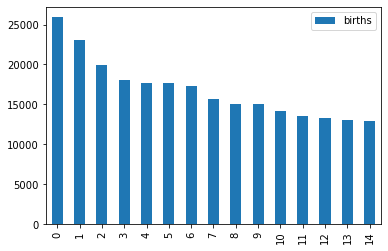

In [ ]:
names2000[:15].plot(kind='bar')

The default behavior for a `pd.DataFrame` plot is to use the index as the axis and plot a numerical column.  This yields:

<AxesSubplot:xlabel='name'>

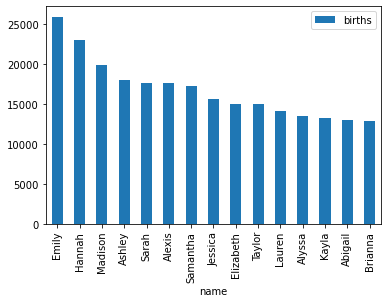

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'],index_col=['name'])
names2000[:15].plot(kind='bar')

So the x-axis does not show the names.

Let's fix that by reloading and making the `names`
columnd also serve as the index.

# Aggregation

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

In [ ]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path)
complaints['Count'] = 1

/Users/gawron/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the `Count` column:

In [ ]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [ ]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.

In [ ]:
pt0 = pt00.pivot_table('Count', 'Agency' , columns = 'Complaint Type',
                       aggfunc=sum)

In [ ]:
pt0

Complaint Type,Agency Issues,Animal Abuse,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Bridge Condition,Broken Muni Meter,Bus Stop Shelter Placement,Compliment,Curb Condition,DOT Literature Request,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Ferry Inquiry,Ferry Permit,Graffiti,Highway Condition,Highway Sign - Damaged,Homeless Encampment,Illegal Fireworks,Illegal Parking,Invitation,Municipal Parking Facility,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Parking Card,Posting Advertisement,Public Toilet,Request for Information,Sidewalk Condition,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Traffic,Traffic Signal Condition,Tunnel Condition,Urinating in Public,Vending
Agency,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOT,20.0,NaN,7.0,NaN,NaN,20.0,2070.0,14.0,1.0,66.0,123.0,NaN,NaN,NaN,4.0,32.0,1.0,NaN,130.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,6.0,NaN,339.0,3473.0,7117.0,691.0,110.0,327.0,NaN,3145.0,1.0,NaN,NaN
NYPD,NaN,164.0,NaN,32.0,4590.0,NaN,NaN,NaN,NaN,NaN,NaN,803.0,26.0,83.0,NaN,NaN,NaN,13.0,NaN,NaN,269.0,3.0,3343.0,NaN,NaN,2578.0,67.0,191.0,1928.0,750.0,23.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,30.0,229.0


In [ ]:
pd.pivot??

# 4.  Baby names questions

Niote You may have mounted your Google Drive above.  In that case, skip this cell but make sure the variable `data_dir` is set to the value used in the next cell. 

### 4.1 Get all the babynames data for all the years

... in the data and plot make and female births in the same plot.

In [1]:
from google.colab import drive
import os.path
import pandas as pd

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/data'

Mounted at /content/gdrive


In [3]:
os.chdir(data_dir)

In [4]:
os.getcwd()

'/content/gdrive/My Drive/data'

Note the backslash which is needed because of the space in `My Drive`.

Use the next cell to list the files in the top level dir of your Googkle Drive.

In [19]:
!ls /content/gdrive/My\ Drive/

The next cell collects the babynames files extracted onto your Google drive from a previous pandas notebook into a single dataframe.


In [6]:

years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


#### Plot births for all the years in the data

### 4.1 (ctd.) Plotting male vs female births in each year

In [28]:
female = names[names['sex'] == 'F']
male = names[names['sex'] == 'M']
f_births = pd.pivot_table(female, 'births', index = 'year',aggfunc='sum')
m_births = pd.pivot_table(male, 'births', index = 'year',aggfunc='sum')
f_births.head()

,births
year,
1880,90993
1881,91955
1882,107851
1883,112322
1884,129021


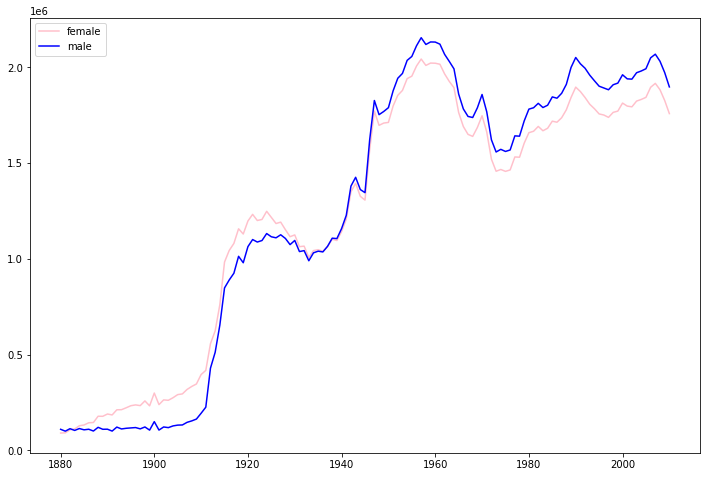

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from string import ascii_lowercase

fig, ax = plt.subplots(1,1, figsize = (12,8))
ax.plot(f_births.index,f_births['births'],label="female",color='pink')
ax.plot(m_births.index,m_births['births'],label="male",color='blue')
ax.legend()

### 4.2  Plotting last letter freqs (male and female names)

In [8]:
def get_names_by_gender (gender):
    return set(names[names['sex']==gender]['name'].values)

female_names = get_names_by_gender ('F')
male_names = get_names_by_gender ('M')

Fact: There are lots more female names than male names.

In [9]:
len(female_names),len(male_names)

(61406, 36742)

Now collect the last letters from the members of the sets;
`llf` and `llm` are sequences of length 61,406 and 36,742 respectively, the last letters of each name from the two sets.  Next we count the letter frequencies in these
two sequences.

In [10]:
llf = [nm[-1] for nm in female_names]
llm = [nm[-1] for nm in male_names]

In [11]:
from nltk import FreqDist

female_name_lldist = FreqDist(llf)
male_name_lldist = FreqDist(llm)

We see "a" is the most frequent last letter in female names,
which makes female names different both from male names and from English words in general.

In [20]:
female_name_lldist.most_common()

[('a', 26199),
 ('e', 11501),
 ('n', 6351),
 ('h', 3921),
 ('y', 3501),
 ('i', 3357),
 ('l', 2043),
 ('s', 1124),
 ('r', 854),
 ('t', 618),
 ('o', 569),
 ('d', 301),
 ('m', 224),
 ('u', 185),
 ('z', 170),
 ('g', 135),
 ('k', 93),
 ('x', 54),
 ('c', 53),
 ('b', 38),
 ('w', 29),
 ('p', 25),
 ('j', 25),
 ('v', 14),
 ('f', 12),
 ('q', 10)]

We see "n" is the most frequent last letter for male names.

In [21]:
male_name_lldist.most_common()

[('n', 9679),
 ('e', 4451),
 ('l', 2938),
 ('s', 2727),
 ('r', 2254),
 ('y', 2137),
 ('o', 2073),
 ('a', 1758),
 ('i', 1587),
 ('d', 1473),
 ('h', 1168),
 ('t', 844),
 ('k', 812),
 ('m', 803),
 ('z', 319),
 ('g', 279),
 ('u', 237),
 ('c', 237),
 ('b', 231),
 ('f', 154),
 ('w', 110),
 ('v', 109),
 ('p', 108),
 ('x', 106),
 ('j', 94),
 ('q', 54)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':


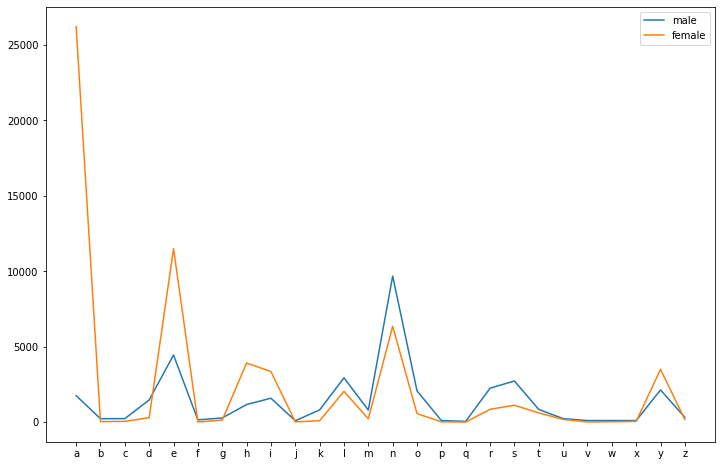

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from string import ascii_lowercase

fig, ax = plt.subplots(1,1, figsize = (12,8))
m_lets, m_counts = zip(*sorted(list(male_name_lldist.items())))
f_lets, f_counts = zip(*sorted(list(female_name_lldist.items())))
# A sanity check.  Raise an error if the two letter sets
# arent the same. if this did happen we would add a letter
# with 0 count to make the plot lines align properly
assert m_lets==f_lets, "Missing letters in distribution"
# Label the x-axis with letters placed where the first 26 integers are.
ax.set_xticks(np.arange(26),ascii_lowercase)
ax.plot(m_lets,m_counts,label="male")
ax.plot(m_lets,f_counts,label="female")
ax.legend()

In [31]:
names['decade']  = names['year'].apply(lambda x: 10 * (x//10))


,name,sex,births,year,decade
1690779,Zymaire,M,5,2010,2010
1690780,Zyonne,M,5,2010,2010
1690781,Zyquarius,M,5,2010,2010
1690782,Zyran,M,5,2010,2010
1690783,Zzyzx,M,5,2010,2010


In [33]:
names[names['year']==2009]

,name,sex,births,year,decade
1622344,Isabella,F,22222,2009,2000
1622345,Emma,F,17830,2009,2000
1622346,Olivia,F,17374,2009,2000
1622347,Sophia,F,16869,2009,2000
1622348,Ava,F,15826,2009,2000
...,...,...,...,...,...
1656941,Zyquarius,M,5,2009,2000
1656942,Zyran,M,5,2009,2000
1656943,Zyreion,M,5,2009,2000
1656944,Zyrian,M,5,2009,2000


In [44]:
f_names = names[names['sex']=='F']
f_names_1880s = f_names[f_names['decade']  == 1880]
f_names_1940s = f_names[f_names['decade']  == 1940]
f_names_1990s = f_names[f_names['decade']  == 1990]

In [48]:
import numpy as np

name_list = sorted(['Mary','Emma',"Georgia","Kim","Marilyn","Alice","Ann","Susan","Suzanne","Louise"])
decades = [f_names_1880s,f_names_1940s,f_names_1990s]
decade_names = [1880,1940,1990]
data = np.zeros((len(decades),len(name_list)))

for (i,dec_df) in enumerate(decades):
  for (j,name) in enumerate(name_list):
    data[i,j] = dec_df[dec_df['name'] == name]['births'].sum()



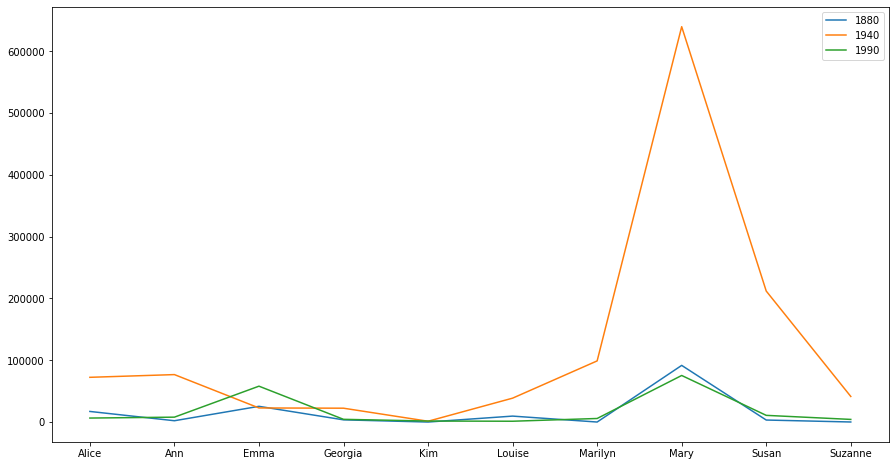

In [52]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1, figsize = (15,8))
#m_lets, m_counts = zip(*sorted(list(male_name_lldist.items())))
#f_lets, f_counts = zip(*sorted(list(female_name_lldist.items())))
# A sanity check.  Raise an error if the two letter sets
# arent the same. if this did happen we would add a letter
# with 0 count to make the plot lines align properly
#assert m_lets==f_lets, "Missing letters in distribution"
# Label the x-axis with letters placed where the first 26 integers are.
x = np.arange(len(name_list))
plt.xticks(x,name_list)
for i in range(len(decades)):
  ax.plot(x,data[i,:],label=decade_names[i])
ax.legend()